In [1]:
## Clonamos el repositorio con las imagenes
!git clone https://github.com/JuanMCarreonCh/apple-orange-dataset.git

Cloning into 'apple-orange-dataset'...
remote: Enumerating objects: 3279, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3279 (delta 3), reused 10 (delta 2), pack-reused 3268 (from 1)
Receiving objects: 100% (3279/3279), 55.19 MiB | 11.45 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (3514/3514), done.


In [2]:
## Importamos las librerias que utilizaremos para leer las imagenes
## si hacen falta las agregaremos despues
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import PIL
import cv2

In [3]:
# Podemos ver que glob devuelve una lista directorios dependiendo si le pasamos
# una ruta directa o si le pasamos una ruta con un wildcard
list(glob("apple-orange-dataset/train/"))

['apple-orange-dataset/train/']

In [4]:
# leemos las rutas
train_apple_paths = list(glob("apple-orange-dataset/train/apples/*.jpg"))
train_orange_paths = list(glob("apple-orange-dataset/train/oranges/*.jpg"))
test_apple_paths = list(glob("apple-orange-dataset/test/apples/*.jpg"))
test_orange_paths = list(glob("apple-orange-dataset/test/oranges/*.jpg"))

array([[[145, 214, 230],
        [142, 212, 228],
        [138, 210, 225],
        ...,
        [139, 201, 216],
        [137, 199, 214],
        [137, 199, 214]],

       [[143, 211, 228],
        [141, 210, 226],
        [141, 210, 226],
        ...,
        [137, 199, 214],
        [135, 197, 212],
        [134, 197, 212]],

       [[144, 211, 228],
        [144, 211, 228],
        [144, 211, 228],
        ...,
        [135, 197, 212],
        [132, 196, 211],
        [131, 197, 211]],

       ...,

       [[206, 214, 216],
        [214, 224, 225],
        [207, 217, 218],
        ...,
        [ 37,  38,  32],
        [ 45,  46,  40],
        [ 52,  53,  47]],

       [[205, 215, 216],
        [215, 225, 226],
        [212, 221, 222],
        ...,
        [ 52,  53,  48],
        [ 51,  52,  47],
        [ 49,  50,  45]],

       [[217, 227, 226],
        [214, 224, 225],
        [214, 224, 225],
        ...,
        [ 43,  45,  39],
        [ 36,  37,  32],
        [ 41,  42,  37]]], dtype=uint8)
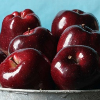

In [33]:
# Pasamos todas las imagenes a un tamaño especifico de 100x100 para poderlas trabajar
# Definimos que los colores a rgb
train_apple_imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path),
                                            cv2.COLOR_BGR2RGB),(100,100)) for path in train_apple_paths]
train_orange_imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path),
                                            cv2.COLOR_BGR2RGB),(100,100)) for path in train_orange_paths]
test_apple_imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path),
                                            cv2.COLOR_BGR2RGB),(100,100)) for path in test_apple_paths]
test_orange_imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path),
                                            cv2.COLOR_BGR2RGB),(100,100)) for path in test_orange_paths]
train_apple_imgs[0]

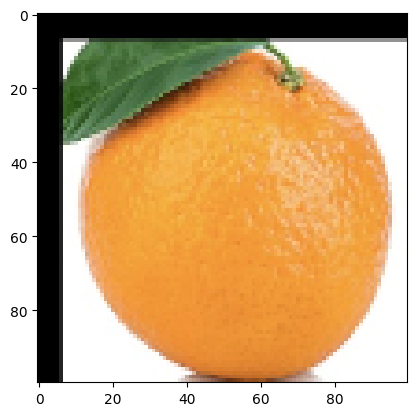

In [34]:
# Guardamos las imagenes originales en una copia por si acaso queremos verlas despues
train_apples = train_apple_imgs.copy()
train_oranges = train_orange_imgs.copy()
test_apples = test_apple_imgs.copy()
test_oranges = test_orange_imgs.copy()
plt.imshow( train_oranges[26])

1566
1672
198
74


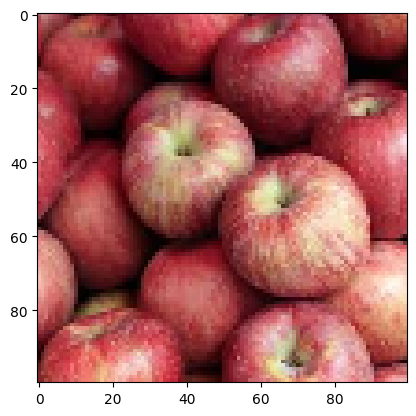

In [10]:
# Revisamos la cantidad de datos que tenemos
print(len(train_apple_imgs))
print(len(train_orange_imgs))
print(len(test_apple_imgs))
print(len(test_orange_imgs))
plt.imshow( train_apple_imgs[17])

In [11]:
# los pasamos a np array igualando la cantidad de datos
# y nos quedaremos solo con el canal de verdes por que al irnos
# acercando al color naranja el canal de color verde va aumentando,
# por lo cual se nota una mayor diferencia en las imagenes y
# en teoria las naranjas deberian tener valores mas altos en el canal verde
train_apple_imgs = np.array(train_apple_imgs[:])[:,:,:,1]
train_orange_imgs = np.array(train_orange_imgs[:1566])[:,:,:,1]
test_apple_imgs = np.array(test_apple_imgs[:74])[:,:,:,1]
test_orange_imgs = np.array(test_orange_imgs[:])[:,:,:,1]

In [12]:
# Comprobamos la igualdad de datos
print(len(train_apple_imgs))
print(len(train_orange_imgs))
print(len(test_apple_imgs))
print(len(test_orange_imgs))

1566
1566
74
74


In [13]:
## Concatenamos los arrays para tener todos los datos en un solo array
## tanto en train como test
x_train = np.concatenate((train_apple_imgs, train_orange_imgs))
x_test = np.concatenate((test_apple_imgs, test_orange_imgs))

In [14]:
# Como sabemos que al concatenar solo se hace un union y se respeta el orden
# Creamos los labels y le vamos a dar la siguiente clasificacion
# Manzanas = 0
# Naranjas = 1
y_train = np.concatenate((np.zeros(train_apple_imgs.shape[0]),
                                    np.ones(train_orange_imgs.shape[0])
                                    ))
y_test = np.concatenate((np.zeros(len(test_apple_imgs)),
                                    np.ones(len(test_orange_imgs))
                                    ))

In [15]:
# Hacemos un pequeño escalado a los datos para dejarlos en rango de 0 a 1
x_train = x_train/255
x_test = x_test/255

In [16]:
# importamos las librerias
import tensorflow as tf

In [92]:
## Comenzamos a armar nuestro modelo
model = tf.keras.models.Sequential([
  # Agregamos la capa de entrada definiendo que entraran imagenes de 100x100
  tf.keras.layers.Input((100,100,1)),

  # Agregamos una primera etapa con una capa de convolucion y una capa de pooling
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Agregamos una segunda etapa con una capa de convolucion y una capa de pooling
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Agregamos una tercera etapa con una capa de convolucion y una capa de pooling
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  #Agregamos una capa de flaten para dejar un arreglo de 1 dimension
  tf.keras.layers.Flatten(),

  # Agregamos una quinta etapa con una capa densa que trabaje con el arreglo (dense)
  tf.keras.layers.Dense(254, activation='relu'),

  # Agregamos una capa de salida que nos devuelva 2 categorias 0 y 1 de tipo softmax
  tf.keras.layers.Dense(2, activation='softmax')
])

In [93]:
# Compilamos nuestra red y utilizaremos el optimizador Adam
# y lafuncion de perdida de crossentropy
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [94]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 21, 21, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 254)                 │       1,625,854 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,774,652 (6.77 MB)

 Trainable params: 1,774,652 (6.77 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7813 - loss: 0.4431
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9129 - loss: 0.2004
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9379 - loss: 0.1448
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9367 - loss: 0.1510
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9441 - loss: 0.1293
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9690 - loss: 0.0814
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9721 - loss: 0.0715
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9814 - loss: 0.0490
Epoch 9/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9712 - loss: 0.0784
Epoch 10/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9865 - loss: 0.0301
Epoch 11/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9885 - loss: 0.0401
Epoch 12/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy:

In [96]:
# Evaluamos nuestro modelo ahora probando con las imagenes de prueba que teniamos
# inicialmente separadas
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9048 - loss: 0.6269


[0.603950023651123, 0.9189189076423645]

Orange index=120
Label: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Prediction: 1


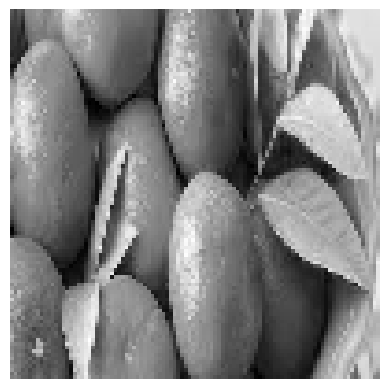

In [97]:
# Revisamos algunos resultados al azar
import random

test_index = random.randint(0, 148 - 1)

plt.imshow(x_test[test_index],cmap='gray')
if(test_index < 74):
  print(f"Apple index={test_index}")
else:
  print(f"Orange index={test_index}")
plt.axis(False)

print("Label:", y_test[test_index])
input_image = np.reshape(x_test[test_index], (1, 100, 100, 1))
prediction = model.predict(input_image)
print("Prediction:", np.argmax(prediction))

Orange index=120


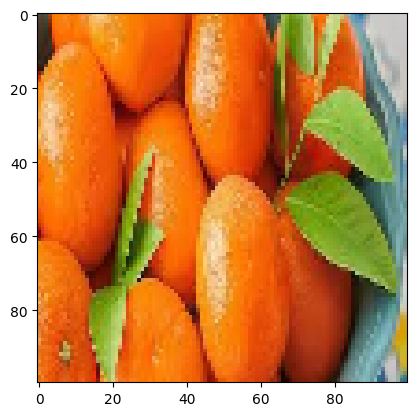

In [98]:
# Recordando guardamos una copia de las imagenes orginales,
# y tambien siempre se mantuvo el orden de los dataframe con las manzanas
# primero y despues las naranjas por el union que se hizo
# y nunca se reordenaron
if(test_index < 74):
  print(f"Apple index={test_index}")
  plt.imshow(test_apples[test_index])
else:
  print(f"Orange index={test_index}")
  plt.imshow(test_oranges[test_index-74])

# Conclusión
Como podemos observar que el modelo consigue una precision de un 90.48 por ciento al solo usar solo el canal verde demostrando que la diferencia en el canal verde si muestra un poco la diferencia entre manzanas y naranjas, aunque aun asi es un poco pobre la precision y podriamos intentar con mas canales o talvez aplicando mascaras a los colores.  
Se utilizaron etapas de capas de convolucion2d para filtros de tamaño 3x3 junto con capas de max pooling de 2x2 para ir reduciendo las imagenes para quedarnos con los valores mas grandes, que esperariamos fueran los que son naranjas por tener un tonor verde mas fuerte.  
La cantidad de neuronas por capa la tomamos un poco al 64 como base. Todas las capas ocultas las dejamos con la funcion de activacion 'Relu' y utilizamos la funcion de activacion softmax para obtener un resultado de dos categorias.  
Se observa que donde mas problemas tiene para clasificar de buena manera las manzanas es cuando el color no es rojo, sino que se encuentran un poco amarillas.

In [99]:
# Guardamos nuestro modelo
model.save('modelo_class_oranges_vs_apples.h5')